#Adib Rezaei - 810198401

#A4 - Phase 2

Neural Network using keras and tensorFlow

Import libraries

In [ ]:
import os
import numpy
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import keras.backend as K
from tensorflow import keras
from google.colab import drive
from keras import backend as K
from tensorflow.keras import *
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow_datasets as tfds
from keras.models import Sequential
from tensorflow.keras.utils import *
from keras.layers import Dense, Dropout
from keras.models import Sequential,load_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from keras.callbacks import Callback,ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

Mount drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


Extract zipfile located in google drive

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Clean the given data by deleting the .gif files and generating a map from animmal class to its images

In [ ]:
animal_classes = ['elk', 'bald_eagle', 'raven', 'racoon']

def del_gif_files(animal_class, dataset_type):
  dir = "/tmp/dataset/" + dataset_type + '/' + animal_class
  files_in_dir = os.listdir(dir)
  filtered_files = [file for file in files_in_dir if file.endswith(".gif")]
  for file in filtered_files:
    path_to_file = os.path.join(dir, file)
    os.remove(path_to_file)


img_paths = list()
animals = list()

def generate_type_to_img_map():
  type_to_img_map = {}
  for animal_class in animal_classes:
    type_to_img_map[animal_class] = []
    path = '/tmp/dataset/train/' + animal_class
    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      img_paths.append(os.path.join(path, img))
      animals.append(animal_class)
      type_to_img_map[animal_class].append(img_path)

  return type_to_img_map



Reading the data and print out the summary

In [ ]:
for animal_class in animal_classes:
  del_gif_files(animal_class, 'test')
  del_gif_files(animal_class, 'train')

type_to_img_map = generate_type_to_img_map()
for type_a in type_to_img_map:
  print(f'animal {type_a} count : {len(type_to_img_map[type_a])}')

df = pd.DataFrame(
    {
        'image' : img_paths,
        'animals' : animals
    }
)

animal elk count : 462
animal bald_eagle count : 521
animal raven count : 455
animal racoon count : 507


Plot the distribution of animal classes

<BarContainer object of 4 artists>

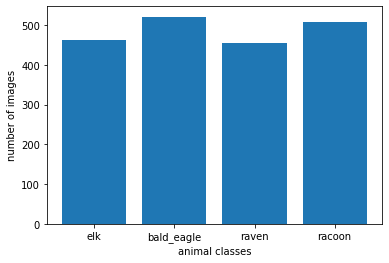

In [ ]:
plt.xlabel('animal classes')
plt.ylabel('number of images')
plt.bar(animal_classes, [len(type_to_img_map[type_a]) for type_a in type_to_img_map], align='center')

Showing random images from dataset

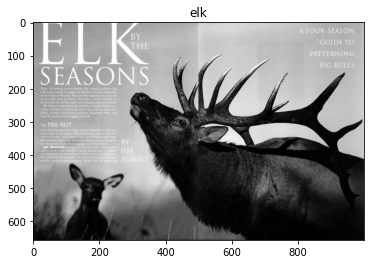

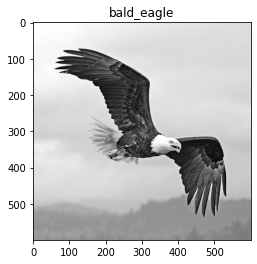

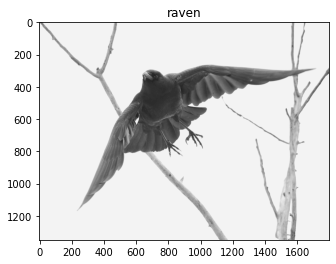

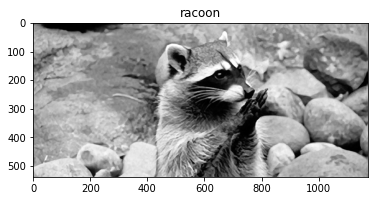

In [ ]:
def random_showimg(animal_class):
  img_path = type_to_img_map[animal_class][0]
  image = Image.open(img_path).convert('L')
  fig = plt.figure()
  plt.imshow(image, cmap='gray')
  plt.title(animal_class)
  plt.show()


for type_a in type_to_img_map:
  random_showimg(type_a)

getting all trainset into a variable to later use it as a predicator

In [ ]:
 data_gen = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.2
)

 all_train_set = data_gen.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'animals',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 1945 validated image filenames belonging to 4 classes.


Split the dataset into train set and validation set

In [ ]:
train_set = data_gen.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'animals',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

validation_set = data_gen.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'animals',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True
)

Found 1556 validated image filenames belonging to 4 classes.
Found 389 validated image filenames belonging to 4 classes.


## One Hot Encoding

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

**source**: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

Testing with 2 layer relu activation function

In [ ]:


input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])


The summary is textual and includes information about:

* The layers and their order in the model.
* The output shape of each layer.
* The number of parameters (weights) in each layer.
* The total number of parameters (weights) in the model.

Here we can see that layer 1 (flatten input) has a vecotr of 16348 elements (128 \* 128 \* 1) and layer 2 of the model has 16778240 (1024 \* 16383) and the others calculated this way also.

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 flatten_7 (Flatten)         (None, 16384)             0         
                                                                 
 dense_23 (Dense)            (None, 1024)              16778240  
                                                                 
 dense_24 (Dense)            (None, 512)               524800    
                                                                 
 dense_25 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 17,305,092
Trainable params: 17,305,092
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_set, validation_data=validation_set, epochs = 10)

Epoch 1/10
 9/49 [====>.........................] - ETA: 41s - loss: 1.9929 - accuracy: 0.3090

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 56s 1s/step - loss: 1.3386 - accuracy: 0.4222 - val_loss: 3.2311 - val_accuracy: 0.0000e+00
Epoch 2/10
49/49 [==============================] - 55s 1s/step - loss: 1.0817 - accuracy: 0.5341 - val_loss: 2.9765 - val_accuracy: 0.0000e+00
Epoch 3/10
49/49 [==============================] - 55s 1s/step - loss: 1.0409 - accuracy: 0.5604 - val_loss: 2.5955 - val_accuracy: 0.0000e+00
Epoch 4/10
49/49 [==============================] - 55s 1s/step - loss: 0.9592 - accuracy: 0.6060 - val_loss: 2.8005 - val_accuracy: 0.0000e+00
Epoch 5/10
49/49 [==============================] - 54s 1s/step - loss: 0.9278 - accuracy: 0.6285 - val_loss: 2.8834 - val_accuracy: 0.0000e+00
Epoch 6/10
49/49 [==============================] - 55s 1s/step - loss: 0.9056 - accuracy: 0.6247 - val_loss: 3.3070 - val_accuracy: 0.0000e+00
Epoch 7/10
49/49 [==============================] - 54s 1s/step - loss: 0.8777 - accuracy: 0.6382 - val_loss: 2.8330 - val_accuracy: 0.0000e+00
Epo

In [ ]:
train_prediction = model.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
perdsCategs = list()
for i in pred_argmax:
  if i == 0:
    perdsCategs.append('bald_eagle')
  elif i == 1:
    perdsCategs.append('elk')
  elif i == 2:
    perdsCategs.append('racoon')
  else:
    perdsCategs.append('raven')

print(perdsCategs)
print('Ten flase predicted  ')
plt.figure(figsize=(500,50))
counter = 0
for i in range(len(testImgCategs)):
  if(perdsCategs[i] != testImgCategs[i]):
    plt.subplot(10,1,counter+1)
    img = Image.open(testImgPathes[i])
    img.thumbnail((100, 100))
    plt.imshow(img)
    counter += 1
    if counter > 10:
      break

In [ ]:
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

              precision    recall  f1-score   support

         elk       0.42      0.90      0.57       521
  bald_eagle       1.00      0.01      0.03       462
       raven       0.76      0.54      0.63       507
      racoon       0.72      0.73      0.72       455

    accuracy                           0.56      1945
   macro avg       0.73      0.55      0.49      1945
weighted avg       0.72      0.56      0.49      1945



Plot history summary function

In [ ]:
def plot_history_summary(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


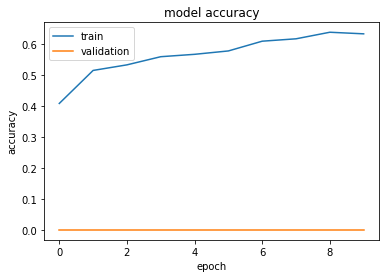

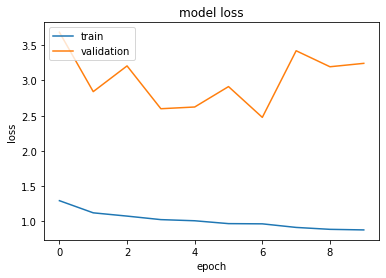

In [ ]:
plot_history_summary(history)

Testing with 3 layer relu activation function

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(64, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_model_2 = model.fit(train_set, validation_data=validation_set, epochs = 10)

Epoch 1/10
 3/49 [>.............................] - ETA: 40s - loss: 1.4700 - accuracy: 0.2619

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 55s 1s/step - loss: 1.2184 - accuracy: 0.4210 - val_loss: 2.7912 - val_accuracy: 0.0000e+00
Epoch 2/10
49/49 [==============================] - 52s 1s/step - loss: 1.1205 - accuracy: 0.4961 - val_loss: 2.8389 - val_accuracy: 0.0000e+00
Epoch 3/10
49/49 [==============================] - 54s 1s/step - loss: 1.0655 - accuracy: 0.5392 - val_loss: 2.6067 - val_accuracy: 0.0000e+00
Epoch 4/10
49/49 [==============================] - 52s 1s/step - loss: 1.0448 - accuracy: 0.5617 - val_loss: 2.6725 - val_accuracy: 0.0000e+00
Epoch 5/10
49/49 [==============================] - 52s 1s/step - loss: 1.0126 - accuracy: 0.5778 - val_loss: 2.7125 - val_accuracy: 0.0000e+00
Epoch 6/10
49/49 [==============================] - 52s 1s/step - loss: 0.9703 - accuracy: 0.5835 - val_loss: 2.9061 - val_accuracy: 0.0000e+00
Epoch 7/10
49/49 [==============================] - 53s 1s/step - loss: 0.9487 - accuracy: 0.6041 - val_loss: 2.9724 - val_accuracy: 0.0000e+00
Epo

In [ ]:
train_prediction = model.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

         elk       0.55      0.68      0.60       521
  bald_eagle       0.00      0.00      0.00       462
       raven       0.53      0.72      0.61       507
      racoon       0.58      0.79      0.67       455

    accuracy                           0.55      1945
   macro avg       0.42      0.55      0.47      1945
weighted avg       0.42      0.55      0.48      1945



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


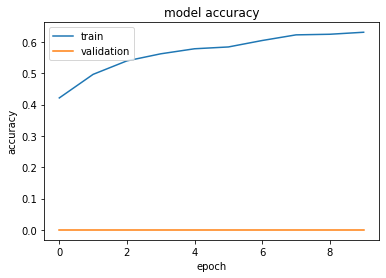

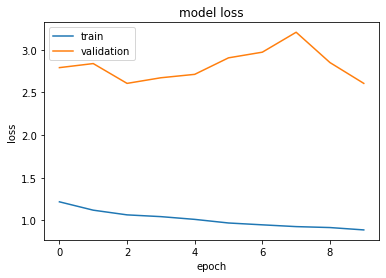

In [ ]:
plot_history_summary(history_model_2)

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation = "sigmoid")(output)
output = layers.Dense(64, activation = "sigmoid")(output)
output = layers.Dense(4, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_model_3 = model.fit(train_set, validation_data=validation_set, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 56s 1s/step - loss: 1.2538 - accuracy: 0.3888 - val_loss: 2.8976 - val_accuracy: 0.0000e+00
Epoch 2/10
49/49 [==============================] - 55s 1s/step - loss: 1.1743 - accuracy: 0.4698 - val_loss: 3.0040 - val_accuracy: 0.0000e+00
Epoch 3/10
49/49 [==============================] - 55s 1s/step - loss: 1.1554 - accuracy: 0.4891 - val_loss: 3.0566 - val_accuracy: 0.0000e+00
Epoch 4/10
49/49 [==============================] - 55s 1s/step - loss: 1.1367 - accuracy: 0.5129 - val_loss: 3.0970 - val_accuracy: 0.0000e+00
Epoch 5/10
49/49 [==============================] - 55s 1s/step - loss: 1.1209 - accuracy: 0.5244 - val_loss: 3.0454 - val_accuracy: 0.0000e+00
Epoch 6/10
49/49 [==============================] - 55s 1s/step - loss: 1.1103 - accuracy: 0.5225 - val_loss: 3.1097 - val_accuracy: 0.0000e+00
Epoch 7/10
49/49 [==============================] - 55s 1s/step - loss: 1.0972 - accuracy: 0.5360 - val_loss: 3.0353 - val_accuracy: 0.0000e+00
Epo

In [ ]:
train_prediction = model.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

         elk       0.42      0.50      0.45       521
  bald_eagle       0.00      0.00      0.00       462
       raven       0.40      0.67      0.50       507
      racoon       0.58      0.62      0.60       455

    accuracy                           0.45      1945
   macro avg       0.35      0.45      0.39      1945
weighted avg       0.35      0.45      0.39      1945



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


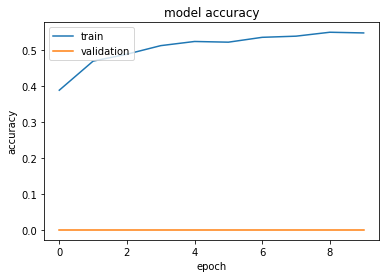

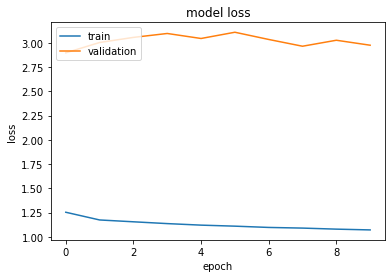

In [ ]:
plot_history_summary(history_model_3)

We see that our best model was our first model which had 3-layer relu activation function in it

## Analyzing the effect of changing parameters

## Optimizer Effect

SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. It is one of the most popular optimization algorithms and many state-of-the-art models are trained using it


The equation is as follows:


![](https://miro.medium.com/max/549/1*KQC1UiYUxdzA5IsSEg4Gow.png)


This is the result on a sample dataset
we can see that higher momentum leads to smoother result rather than noisy resluts but on the other hand values above 0.9 leads to inaccuracy as it tries to be as smooth as it can get.


![](https://miro.medium.com/max/582/1*buj-RJg3wW6RSclnpczkzA.png)


https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(64, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_set, validation_data=validation_set, epochs = 10)

In [ ]:
train_prediction = model.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

In [ ]:
plot_history_summary(history)

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(64, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_set, validation_data=validation_set, epochs = 10)

In [ ]:
train_prediction = model.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

In [ ]:
plot_history_summary(history)

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(64, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

history_model_optimizer = model.fit(train_set, validation_data=validation_set, epochs = 10)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
49/49 [==============================] - 55s 1s/step - loss: 14.8926 - accuracy: 0.3438 - val_loss: 1.8236 - val_accuracy: 0.1260
Epoch 2/10
49/49 [==============================] - 56s 1s/step - loss: 1.2098 - accuracy: 0.4672 - val_loss: 4.6377 - val_accuracy: 0.0000e+00
Epoch 3/10
49/49 [==============================] - 54s 1s/step - loss: 1.1409 - accuracy: 0.5064 - val_loss: 3.2506 - val_accuracy: 0.0000e+00
Epoch 4/10
49/49 [==============================] - 54s 1s/step - loss: 1.0829 - accuracy: 0.5289 - val_loss: 2.8049 - val_accuracy: 0.0000e+00
Epoch 5/10
49/49 [==============================] - 54s 1s/step - loss: 1.0681 - accuracy: 0.5141 - val_loss: 5.0358 - val_accuracy: 0.0000e+00
Epoch 6/10
49/49 [==============================] - 54s 1s/step - loss: 1.0030 - accuracy: 0.5559 - val_loss: 2.5266 - val_accuracy: 0.0000e+00
Epoch 7/10
49/49 [==============================] - 54s 1s/step - loss: 0.9983 - accuracy: 0.5771 - val_loss: 2.5251 - val_accuracy: 0.0000

In [ ]:
train_prediction = model.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

         elk       0.37      0.31      0.34       521
  bald_eagle       0.00      0.00      0.00       462
       raven       0.65      0.24      0.35       507
      racoon       0.33      0.95      0.49       455

    accuracy                           0.37      1945
   macro avg       0.34      0.38      0.29      1945
weighted avg       0.34      0.37      0.30      1945



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


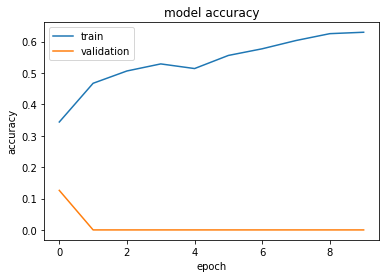

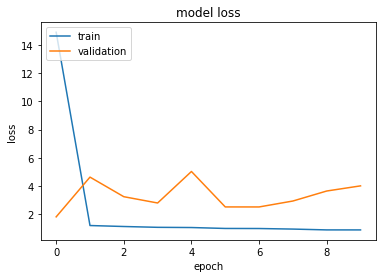

In [ ]:
plot_history_summary(history_model_optimizer)

## Epoch Effect

epoch means 1 forward pass + 1 backward pass on the complete set of training examples. so multiple epoches is needed to do this multiple times in order to train our model very well. if we don't the weights won't update properly.

also high epoch will lead to overfitting meaning that it works well on train dataset but it doesn't do well on test dataset which it didn't see yet this is becaused overfitted models are less generalized.

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(64, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

model2 = models.Model(inputs = input, outputs = output)
opt = keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

history_model_epoch = model2.fit(train_set, validation_data=validation_set, epochs = 20)

Epoch 1/20
 4/49 [=>............................] - ETA: 39s - loss: 91.4667 - accuracy: 0.2891 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 73s 1s/step - loss: 15.9043 - accuracy: 0.3355 - val_loss: 3.9978 - val_accuracy: 0.0000e+00
Epoch 2/20
49/49 [==============================] - 53s 1s/step - loss: 1.2262 - accuracy: 0.4428 - val_loss: 2.6858 - val_accuracy: 0.0000e+00
Epoch 3/20
49/49 [==============================] - 52s 1s/step - loss: 1.0696 - accuracy: 0.5321 - val_loss: 2.1692 - val_accuracy: 0.0000e+00
Epoch 4/20
49/49 [==============================] - 53s 1s/step - loss: 1.0691 - accuracy: 0.5424 - val_loss: 3.2133 - val_accuracy: 0.0000e+00
Epoch 5/20
49/49 [==============================] - 53s 1s/step - loss: 1.0104 - accuracy: 0.5778 - val_loss: 2.7498 - val_accuracy: 0.0000e+00
Epoch 6/20
49/49 [==============================] - 52s 1s/step - loss: 0.9888 - accuracy: 0.5874 - val_loss: 3.6482 - val_accuracy: 0.0000e+00
Epoch 7/20
49/49 [==============================] - 53s 1s/step - loss: 1.0450 - accuracy: 0.5488 - val_loss: 4.4093 - val_accuracy: 0.0000e+00
Ep

In [ ]:
train_prediction = model2.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

         elk       0.47      0.94      0.63       521
  bald_eagle       0.00      0.00      0.00       462
       raven       0.62      0.90      0.74       507
      racoon       0.86      0.33      0.48       455

    accuracy                           0.56      1945
   macro avg       0.49      0.54      0.46      1945
weighted avg       0.49      0.56      0.47      1945



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


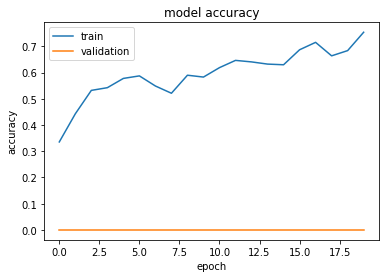

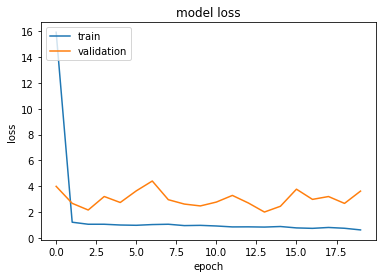

In [ ]:
plot_history_summary(history_model_epoch)

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(64, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

model3 = models.Model(inputs = input, outputs = output)
opt = keras.optimizers.Adam(learning_rate=0.01)
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

history_model_epoch2 = model3.fit(train_set, validation_data=validation_set, epochs = 40)

Epoch 1/40
17/49 [=========>....................] - ETA: 29s - loss: 80.6962 - accuracy: 0.2996

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 54s 1s/step - loss: 29.8893 - accuracy: 0.3772 - val_loss: 3.3391 - val_accuracy: 0.0000e+00
Epoch 2/40
49/49 [==============================] - 53s 1s/step - loss: 1.1951 - accuracy: 0.4724 - val_loss: 4.0547 - val_accuracy: 0.0000e+00
Epoch 3/40
49/49 [==============================] - 53s 1s/step - loss: 1.1334 - accuracy: 0.5244 - val_loss: 3.4449 - val_accuracy: 0.0000e+00
Epoch 4/40
49/49 [==============================] - 53s 1s/step - loss: 1.0663 - accuracy: 0.5398 - val_loss: 2.7097 - val_accuracy: 0.0000e+00
Epoch 5/40
49/49 [==============================] - 53s 1s/step - loss: 0.9797 - accuracy: 0.5977 - val_loss: 2.6838 - val_accuracy: 0.0000e+00
Epoch 6/40
49/49 [==============================] - 55s 1s/step - loss: 1.0262 - accuracy: 0.5643 - val_loss: 2.6819 - val_accuracy: 0.0000e+00
Epoch 7/40
49/49 [==============================] - 53s 1s/step - loss: 0.9428 - accuracy: 0.6112 - val_loss: 2.7090 - val_accuracy: 0.0000e+00
Ep

KeyboardInterrupt: ignored

In [ ]:
train_prediction = model3.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

In [ ]:
plot_history_summary(history_model_epoch2)

NameError: ignored

Loss Function Effect

There are two reasons why Mean Squared Error(MSE) is a bad choice for binary classification problems:


First, using MSE means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms this means we assume a Gaussian prior. While in reality, a dataset that can be classified into two categories (i.e binary) is not from a normal distribution but a Bernoulli distribution


Secondly, the MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function.


When the MSE function is passed a value that is unbounded a nice U-shaped (convex) curve is the result where there is a clear minimum point at the target value (y). On the other hand, when a bounded value from a Sigmoid function is passed to the MSE function the result is not convex; on one side the function is concave while on the other side the function convex and no clear minimum point. So, if by accident a binary classification neural network is initialized with weights which are large in magnitude such that it lands on the concave part of the MSE Cost function gradient descent will not work and consequently, weights may not update or improve very slowly

https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7#:~:text=There%20are%20two%20reasons%20why,choice%20for%20binary%20classification%20problems%3A&text=When%20the%20MSE%20function%20is,the%20target%20value%20(y).

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(64, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

model4 = models.Model(inputs = input, outputs = output)
opt = keras.optimizers.Adam(learning_rate=0.01)
model4.compile(loss='mean_squared_error', optimizer=opt, metrics = ['accuracy'])

history_model_loss = model4.fit(train_set, validation_data=validation_set, epochs = 20)

Epoch 1/20
 1/49 [..............................] - ETA: 1:00 - loss: 0.1994 - accuracy: 0.1250

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 56s 1s/step - loss: 0.3299 - accuracy: 0.3303 - val_loss: 0.5000 - val_accuracy: 0.0000e+00
Epoch 2/20
49/49 [==============================] - 52s 1s/step - loss: 0.3326 - accuracy: 0.3348 - val_loss: 0.5000 - val_accuracy: 0.0000e+00
Epoch 3/20
49/49 [==============================] - 52s 1s/step - loss: 0.3326 - accuracy: 0.3348 - val_loss: 0.5000 - val_accuracy: 0.0000e+00
Epoch 4/20
49/49 [==============================] - 52s 1s/step - loss: 0.3326 - accuracy: 0.3348 - val_loss: 0.5000 - val_accuracy: 0.0000e+00
Epoch 5/20
49/49 [==============================] - 52s 1s/step - loss: 0.3326 - accuracy: 0.3348 - val_loss: 0.5000 - val_accuracy: 0.0000e+00
Epoch 6/20
49/49 [==============================] - 52s 1s/step - loss: 0.3326 - accuracy: 0.3348 - val_loss: 0.5000 - val_accuracy: 0.0000e+00
Epoch 7/20
49/49 [==============================] - 52s 1s/step - loss: 0.3326 - accuracy: 0.3348 - val_loss: 0.5000 - val_accuracy: 0.0000e+00
Epo

In [ ]:
train_prediction = model4.predict(all_train_set)
pred_argmax = np.argmax(train_prediction, axis = 1)
print(classification_report(np.array(all_train_set.classes), np.array(pred_argmax), target_names = animal_classes))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

         elk       0.27      1.00      0.42       521
  bald_eagle       0.00      0.00      0.00       462
       raven       0.00      0.00      0.00       507
      racoon       0.00      0.00      0.00       455

    accuracy                           0.27      1945
   macro avg       0.07      0.25      0.11      1945
weighted avg       0.07      0.27      0.11      1945



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
plot_history_summary(history_model_loss)

Regularization Effect

* What is Regularization?
Simple speaking: Regularization refers to a set of different techniques that lower the complexity of a neural network model during training, and thus prevent the overfitting.
There are three very popular and efficient regularization techniques called L1, L2, and dropout which we are going to discuss in the following.
* L2 Regularization
The L2 regularization is the most common type of all regularization techniques and is also commonly known as weight decay or Ride Regression.
The mathematical derivation of this regularization, as well as the mathematical explanation of why this method works at reducing overfitting, is quite long and complex. Since this is a very practical article I don’t want to focus on mathematics more than it is required. Instead, I want to convey the intuition behind this technique and most importantly how to implement it so you can address the overfitting problem during your deep learning projects.
During the L2 regularization the loss function of the neural network as extended by a so-called regularization term, which is called here Ω.

The regularization term Ω is defined as the Euclidean Norm (or L2 norm) of the weight matrices, which is the sum over all squared weight values of a weight matrix. The regularization term is weighted by the scalar alpha divided by two and added to the regular loss function that is chosen for the current task. This leads to a new expression for the loss function:

Alpha is sometimes called as the regularization rate and is an additional hyperparameter we introduce into the neural network. Simply speaking alpha determines how much we regularize our model.
In the next step we can compute the gradient of the new loss function and put the gradient into the update rule for the weights:


Some reformulations of the update rule lead to the expression which very much looks like the update rule for the weights during regular gradient descent:

The only difference is that by adding the regularization term we introduce an additional subtraction from the current weights (first term in the equation).
In other words independent of the gradient of the loss function we are making our weights a little bit smaller each time an update is performed.



https://towardsdatascience.com/regularization-in-deep-learning-l1-l2-and-dropout-377e75acc036#:~:text=Regularization%20is%20a%20set%20of,data%20from%20the%20problem%20domain.


In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu", bias_regularizer=regularizers.l2(1e-4))(output)
output = layers.Dense(128, activation = "relu", bias_regularizer=regularizers.l2(1e-4))(output)
output = layers.Dense(64, activation = "relu", bias_regularizer=regularizers.l2(1e-4))(output)
output = layers.Dense(4, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

history_model_optimizer = model.fit(train_set, validation_data=validation_set, epochs = 10)

Epoch 1/10
 4/49 [=>............................] - ETA: 39s - loss: 130.6277 - accuracy: 0.2812

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 56s 1s/step - loss: 21.7802 - accuracy: 0.3258 - val_loss: 5.5819 - val_accuracy: 0.0000e+00
Epoch 2/10
49/49 [==============================] - 53s 1s/step - loss: 1.1587 - accuracy: 0.5006 - val_loss: 2.0678 - val_accuracy: 0.0000e+00
Epoch 3/10
49/49 [==============================] - 52s 1s/step - loss: 1.0962 - accuracy: 0.5000 - val_loss: 3.2383 - val_accuracy: 0.0000e+00
Epoch 4/10
49/49 [==============================] - 53s 1s/step - loss: 1.0376 - accuracy: 0.5604 - val_loss: 2.8025 - val_accuracy: 0.0000e+00
Epoch 5/10
49/49 [==============================] - 53s 1s/step - loss: 0.9924 - accuracy: 0.5816 - val_loss: 3.2468 - val_accuracy: 0.0000e+00
Epoch 6/10
49/49 [==============================] - 55s 1s/step - loss: 0.9624 - accuracy: 0.6105 - val_loss: 2.1805 - val_accuracy: 0.0000e+00
Epoch 7/10
49/49 [==============================] - 53s 1s/step - loss: 0.9862 - accuracy: 0.5855 - val_loss: 2.6559 - val_accuracy: 0.0000e+00
Ep

In [ ]:
input = layers.Input(shape = (128, 128, 1))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu", bias_regularizer=regularizers.l2(1e-4))(output)
layers.Dropout(0.1)
output = layers.Dense(128, activation = "relu", bias_regularizer=regularizers.l2(1e-4))(output)
layers.Dropout(0.1)
output = layers.Dense(64, activation = "relu", bias_regularizer=regularizers.l2(1e-4))(output)
layers.Dropout(0.1)
output = layers.Dense(4, activation = "softmax")(output)
layers.Dropout(0.1)

model = models.Model(inputs = input, outputs = output)
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

history_model_optimizer = model.fit(train_set, validation_data=validation_set, epochs = 10)

Epoch 1/10
 2/49 [>.............................] - ETA: 32s - loss: 71.3159 - accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 55s 1s/step - loss: 12.1858 - accuracy: 0.3368 - val_loss: 6.5874 - val_accuracy: 0.0000e+00
Epoch 2/10
49/49 [==============================] - 53s 1s/step - loss: 1.2300 - accuracy: 0.4833 - val_loss: 2.6540 - val_accuracy: 0.0026
Epoch 3/10
49/49 [==============================] - 53s 1s/step - loss: 1.1195 - accuracy: 0.5032 - val_loss: 3.0539 - val_accuracy: 0.0000e+00
Epoch 4/10
49/49 [==============================] - 55s 1s/step - loss: 1.0629 - accuracy: 0.5347 - val_loss: 2.6842 - val_accuracy: 0.0000e+00
Epoch 5/10
49/49 [==============================] - 53s 1s/step - loss: 1.0140 - accuracy: 0.5668 - val_loss: 2.8468 - val_accuracy: 0.0000e+00
Epoch 6/10
49/49 [==============================] - 53s 1s/step - loss: 0.9643 - accuracy: 0.6015 - val_loss: 3.6645 - val_accuracy: 0.0000e+00
Epoch 7/10
49/49 [==============================] - 53s 1s/step - loss: 0.9638 - accuracy: 0.5970 - val_loss: 3.0167 - val_accuracy: 0.0000e+00
Epoch 